# Introduction: single-task optimization

We start with a common test function for optimization known as [Himmelblau's function](https://en.wikipedia.org/wiki/Himmelblau%27s_function), which gives us a single optimization task (find the inputs that minimize the function).

In [1]:
%run -i ../../../examples/prepare_bluesky.py

import bloptools
from bloptools.experiments.tests import himmelblau

boa = bloptools.bayesian.Agent(
                            dofs=himmelblau.dofs, # things which we move around
                            bounds=himmelblau.bounds, # where we're allowed to move them
                            tasks=[himmelblau.MinHimmelblau], # tasks for the optimizer
                            acquisition=himmelblau.acquisition, # a plan to sample data
                            digestion=himmelblau.digestion, # how to process the acquisition into task data
                            db=db, # a databroker instance
                            )

RE(boa.initialize(init_scheme='quasi-random', n_init=32))



Transient Scan ID: 1     Time: 2023-05-23 14:48:10
Persistent Unique Scan ID: '860f8cfb-485b-46ee-b7df-ffc48d8c8e41'


New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 14:48:10.2 |     -1.019 |      0.160 |
|         2 | 14:48:10.2 |      0.000 |     -1.158 |
|         3 | 14:48:10.2 |     -0.295 |     -4.406 |
|         4 | 14:48:10.2 |     -1.866 |     -6.161 |
|         5 | 14:48:10.2 |     -3.260 |     -9.292 |
|         6 | 14:48:10.2 |     -6.331 |     -6.346 |
|         7 | 14:48:10.2 |     -8.696 |     -8.208 |
|         8 | 14:48:10.2 |     -9.645 |     -2.476 |
|         9 | 14:48:10.2 |     -5.404 |     -3.088 |
|        10 | 14:48:10.2 |     -4.814 |     -0.025 |
|        11 | 14:48:10.3 |     -5.929 |      2.338 |
|        12 | 14:48:10.3 |     -4.010 |      4.549 |
|        13 | 14:48:10.3 |     -3.083 |      5.978 |
|        14 | 14:48:10.3 |      1.157 |      4.120 |
|        15 | 14:48:10.3 |      2.103 |      5.158 |
|        16 | 14:48:10.3

+-----------+------------+------------+------------+
generator list_scan ['860f8cfb'] (scan num: 1)





('860f8cfb-485b-46ee-b7df-ffc48d8c8e41',)

We initialized the GP with the "quasi-random" strategy, as it doesn't require any prior data. We can view the state of the optimizer's posterior of the tasks over the input parameters:

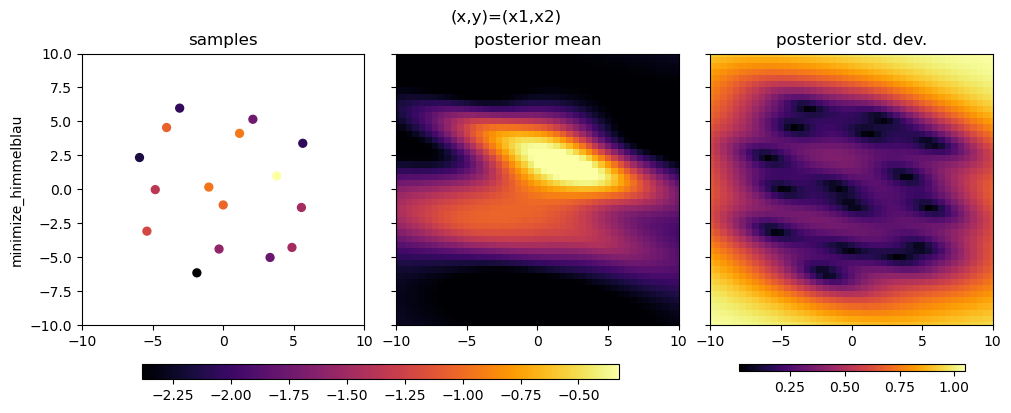

In [2]:
boa.plot_tasks()

We can also the agent's posterior about the probability of goodness over the parameters:

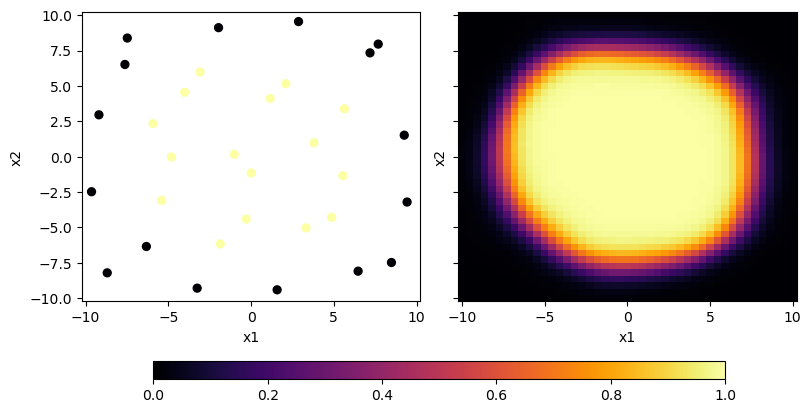

In [3]:
boa.plot_constraints()

We want to learn a bit more, so we can ask the agent where to sample based off of some strategy. Here we use the "esti" strategy, which maximizes the expected sum of tasks improvement.

We can ask the agent to "route" them using ``ortools``, so that we can sample them more quickly if it requires us to e.g. move motors.

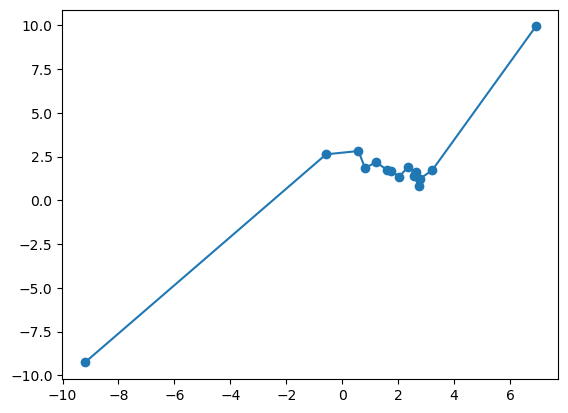

In [4]:
X_to_sample = boa.ask(strategy='esti', n=16, optimize=True, route=True)
plt.scatter(*X_to_sample.T)
plt.plot(*X_to_sample.T)

Let's tell the agent to learn a bit more (it will direct itself):

learning with strategy "esti" ...




Transient Scan ID: 2     Time: 2023-05-23 14:48:36
Persistent Unique Scan ID: '951dc974-322a-468a-8074-e3115d17322f'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 14:48:36.1 |      0.557 |      2.390 |
|         2 | 14:48:36.1 |      1.743 |      2.406 |
|         3 | 14:48:36.1 |      2.255 |      1.542 |
|         4 | 14:48:36.1 |      1.082 |      1.234 |
+-----------+------------+------------+------------+
generator list_scan ['951dc974'] (scan num: 2)





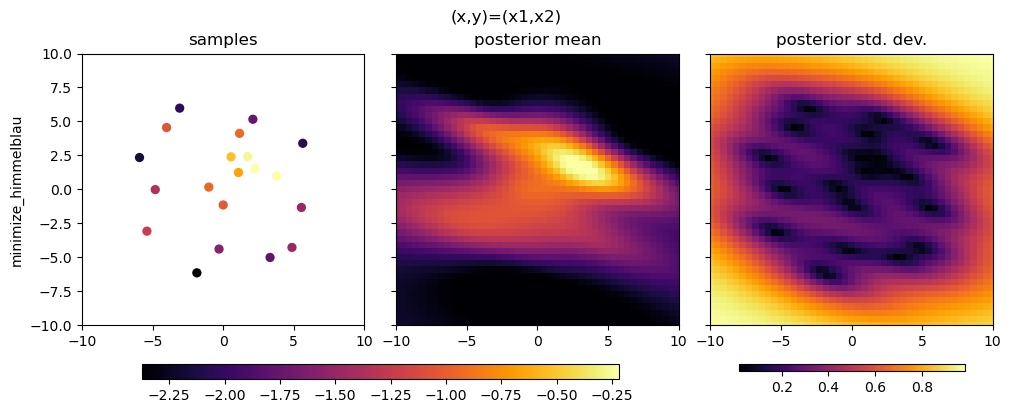

In [5]:
RE(boa.learn(strategy='esti', n_iter=1, n_per_iter=4))
boa.plot_tasks()

The agent has updated its model of the tasks, including refitting the hyperparameters. Continuing:

learning with strategy "esti" ...




Transient Scan ID: 3     Time: 2023-05-23 14:48:43
Persistent Unique Scan ID: 'baf33681-e3a6-4d94-9aa5-18206606eeee'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 14:48:43.0 |      2.837 |      1.268 |
|         2 | 14:48:43.0 |      3.664 |      1.133 |
|         3 | 14:48:43.0 |      4.352 |      1.536 |
|         4 | 14:48:43.0 |      2.930 |      2.096 |
+-----------+------------+------------+------------+
generator list_scan ['baf33681'] (scan num: 3)







Transient Scan ID: 4     Time: 2023-05-23 14:48:48
Persistent Unique Scan ID: '8122ab01-137c-411f-bb3b-0aee142429a7'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 14:48:48.2 |      2.894 |      1.897 |
|         2 | 14:48:48.2 |      2.966 |      1.707 |
|         3 | 14:48:48.2 |      1.566 |      0.312 |
|         4 | 14:48:48.2 |     -9.759 |      0.114 |
+-----------+------------+------------+------------+
generator list_scan ['8122ab01'] (scan num: 4)







Transient Scan ID: 5     Time: 2023-05-23 14:48:52
Persistent Unique Scan ID: '20d64ede-1eb9-4fa8-b78e-84ada5be6390'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 14:48:52.7 |     -8.244 |     -0.221 |
|         2 | 14:48:52.7 |     -8.397 |     -3.596 |
|         3 | 14:48:52.7 |      2.548 |      2.008 |
|         4 | 14:48:52.7 |      3.074 |      2.121 |
+-----------+------------+------------+------------+
generator list_scan ['20d64ede'] (scan num: 5)







Transient Scan ID: 6     Time: 2023-05-23 14:48:57
Persistent Unique Scan ID: '61b24f07-0eef-4f58-bc7d-6e7b42553072'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 14:48:57.5 |      2.756 |      2.631 |
|         2 | 14:48:57.5 |      2.549 |      2.302 |
|         3 | 14:48:57.5 |      3.127 |      1.542 |
|         4 | 14:48:57.5 |     -7.610 |     -3.670 |
+-----------+------------+------------+------------+
generator list_scan ['61b24f07'] (scan num: 6)





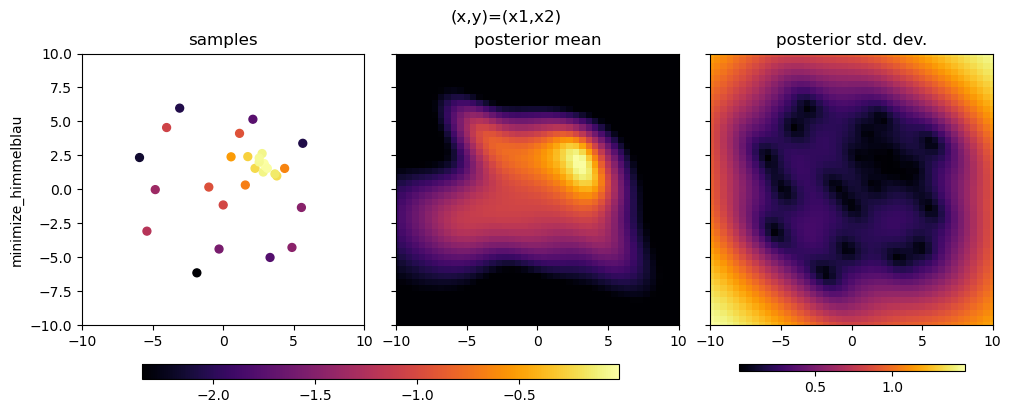

In [6]:
RE(boa.learn(strategy='esti', n_iter=4, n_per_iter=4))
boa.plot_tasks()

Eventually, we reach a point of saturation where no more improvement takes place:

learning with strategy "esti" ...




Transient Scan ID: 7     Time: 2023-05-23 14:49:03
Persistent Unique Scan ID: '7e93c427-7e53-45f4-8a5d-1e3b72d43a3c'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 14:49:03.8 |     -6.366 |     -5.695 |
|         2 | 14:49:03.8 |     -2.295 |      2.949 |
|         3 | 14:49:03.8 |      3.003 |      1.830 |
|         4 | 14:49:03.8 |      3.178 |      1.743 |
+-----------+------------+------------+------------+
generator list_scan ['7e93c427'] (scan num: 7)







Transient Scan ID: 8     Time: 2023-05-23 14:49:08
Persistent Unique Scan ID: '4061c9cc-f35b-486e-9d71-78897b6975ac'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 14:49:08.2 |     -1.600 |      2.953 |
|         2 | 14:49:08.2 |     -1.760 |      2.287 |
|         3 | 14:49:08.2 |     -3.243 |      3.092 |
|         4 | 14:49:08.2 |     -9.950 |     -9.388 |
+-----------+------------+------------+------------+
generator list_scan ['4061c9cc'] (scan num: 8)







Transient Scan ID: 9     Time: 2023-05-23 14:49:13
Persistent Unique Scan ID: 'cc80ccee-e060-4877-acf1-9cfc78df5471'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 14:49:13.8 |      2.912 |     -0.694 |
|         2 | 14:49:13.8 |      3.268 |      2.075 |
|         3 | 14:49:13.8 |     -3.326 |      2.061 |
|         4 | 14:49:13.8 |     -3.063 |      3.075 |
+-----------+------------+------------+------------+
generator list_scan ['cc80ccee'] (scan num: 9)







Transient Scan ID: 10     Time: 2023-05-23 14:49:18
Persistent Unique Scan ID: 'dbd698bf-0532-4104-bbce-abaa233e162a'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 14:49:18.5 |     -3.056 |      3.526 |
|         2 | 14:49:18.5 |      3.160 |      1.981 |
|         3 | 14:49:18.5 |      2.576 |     -2.418 |
|         4 | 14:49:18.5 |     -9.810 |     -9.492 |
+-----------+------------+------------+------------+
generator list_scan ['dbd698bf'] (scan num: 10)





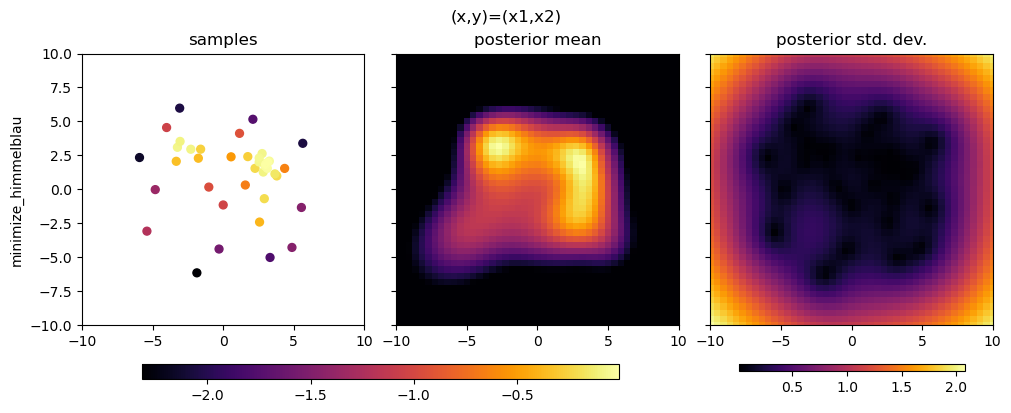

In [7]:
RE(boa.learn(strategy='esti', n_iter=4, n_per_iter=4))
boa.plot_tasks()